<a href="https://colab.research.google.com/github/JRiveraB23/SyS05/blob/main/Punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Punto 2***


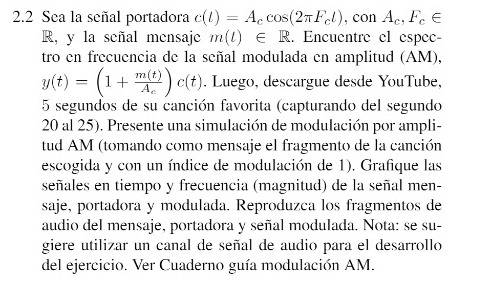

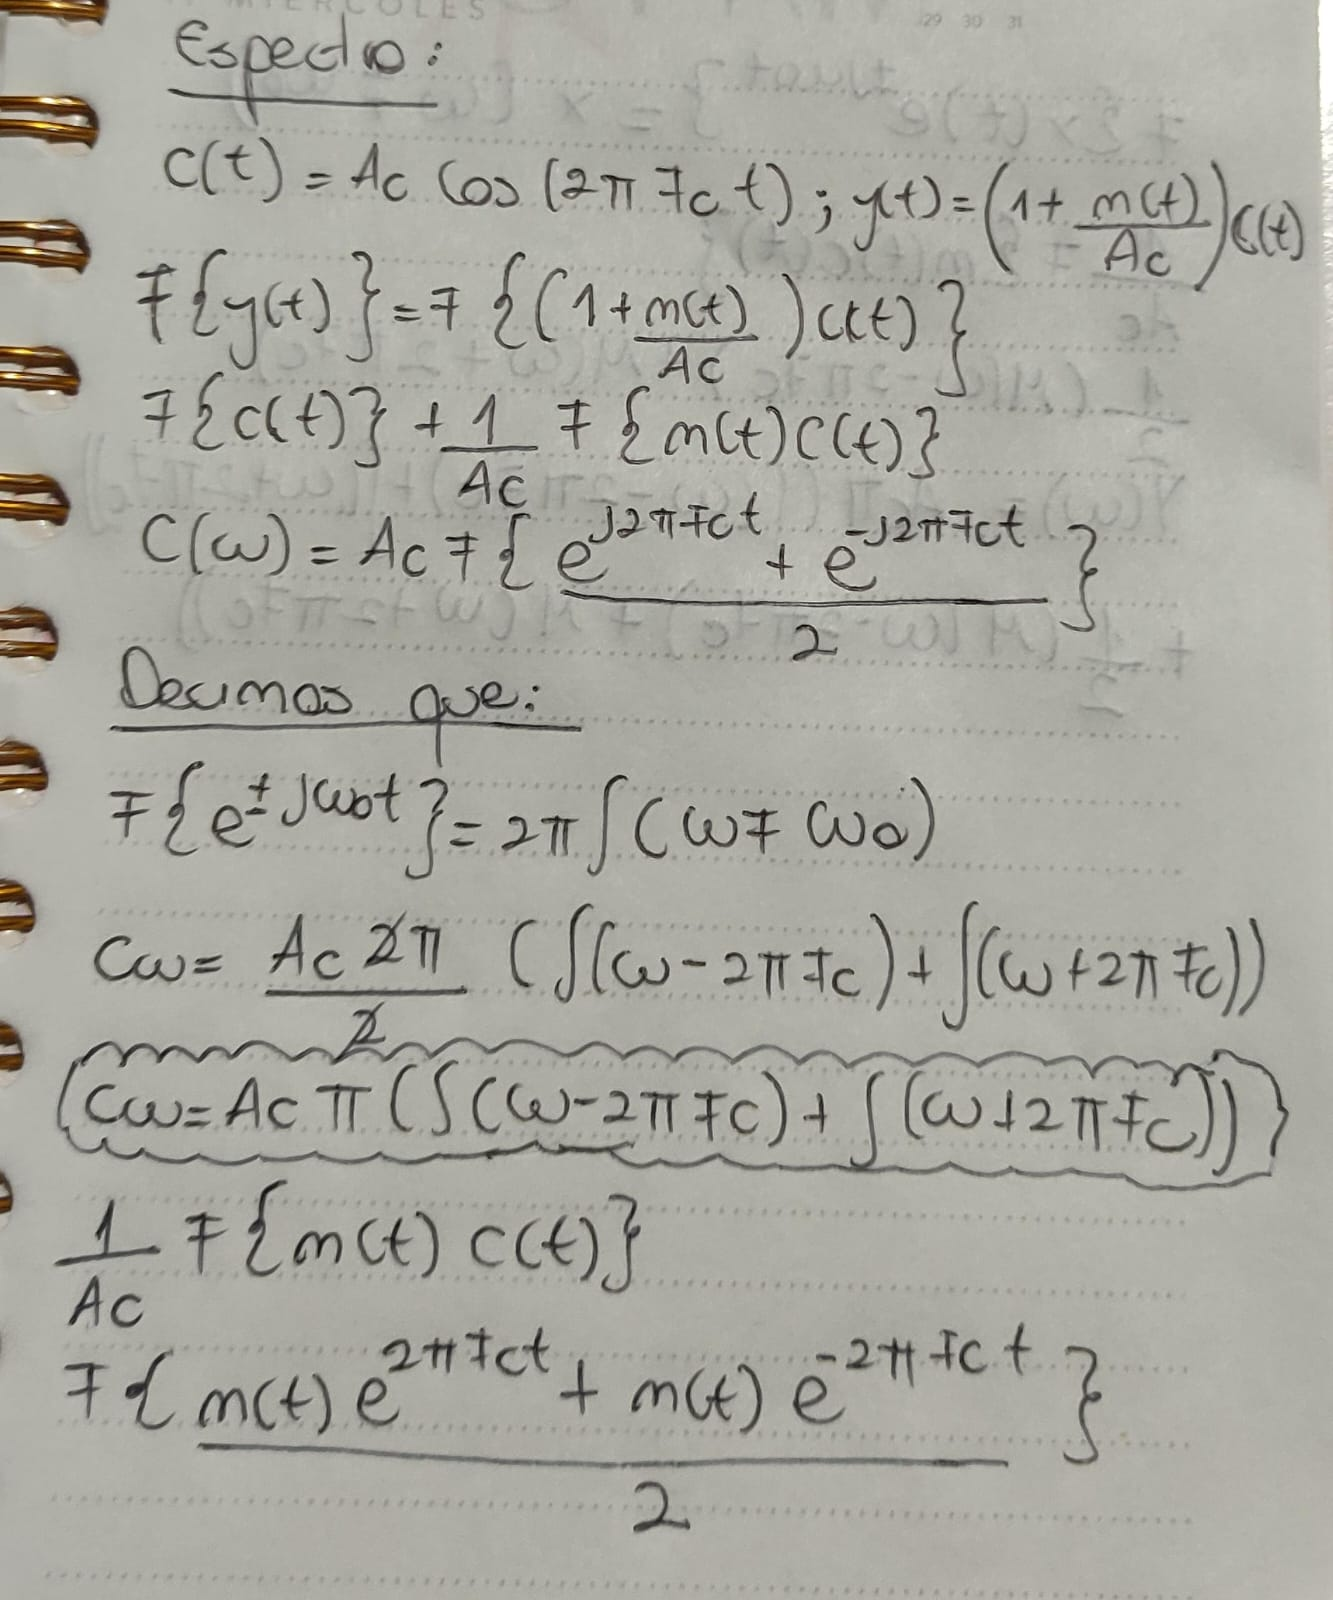

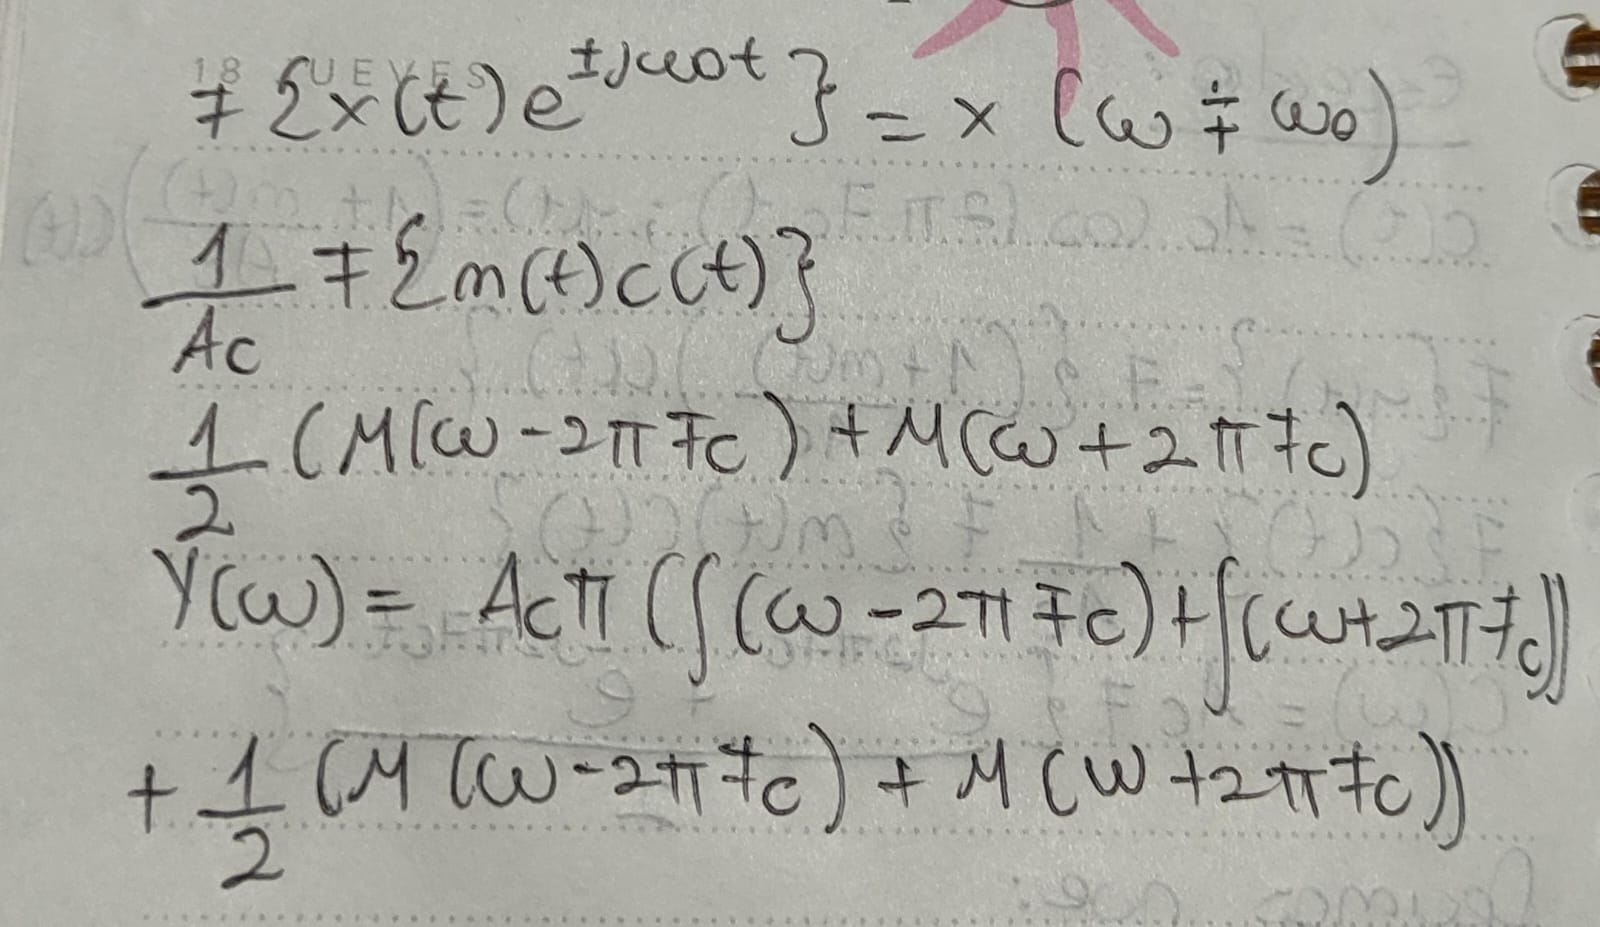

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Primero se obtiene la cancion de youtuve, usando ffmmpeg para convertirlo en un archivo .wav

In [ ]:
#Estos comandos se corrieron desde una consola externa, se ponen aqui por claridad
link = "https://www.youtube.com/watch?v=TnlPtaPxXfc"
! youtube-dl --extract-audio -o "audio.mp3" --audio-format mp3  {link}

In [ ]:
! ffmpeg -i audio.mp3 output.wav

Se pasa a obtener el archivo .wav como array y a seleccionar los 5 segundos para la modulacion

In [ ]:
import soundfile as sf

nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))


Frecuencia de muestreo 44100.00[Hz]
audio output.wav


In [ ]:
from IPython.display import Audio
ti = 140.5 #tiempo incio a procesar seg
tf = 145.5 #tiempo final a procesar seg
xs = x[int(ti*fs):int((tf*fs)),:]

Audio(xs.T,rate=fs)

Como el array viene con dos canales, seleccionamos solo el primero para trabajar

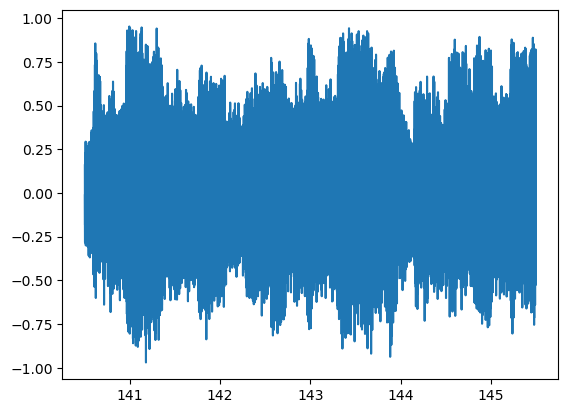

In [ ]:
song = xs[:,0]
t = np.arange(ti, tf, 1/fs) #Vector de tiempo
plt.plot(t, song)

Se pasa a realizar la modulacion AM de la señal

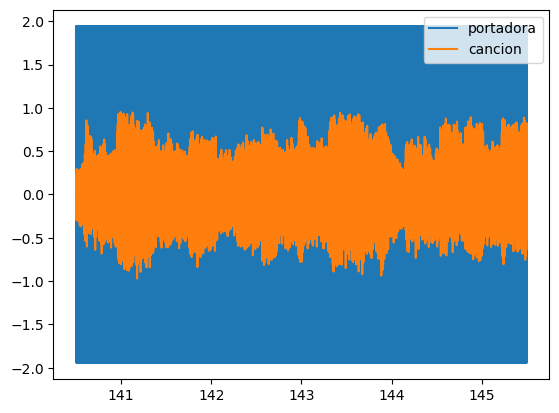

In [ ]:
Im = 0.5 #Indice de modulacion
Fc = 12000 #Frecuencia de la portadora
Ac = max(abs(song))/Im #Amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #Señal Portadora

plt.plot(t,c,label='portadora')
plt.plot(t,song,label='cancion')
plt.legend()
plt.show()


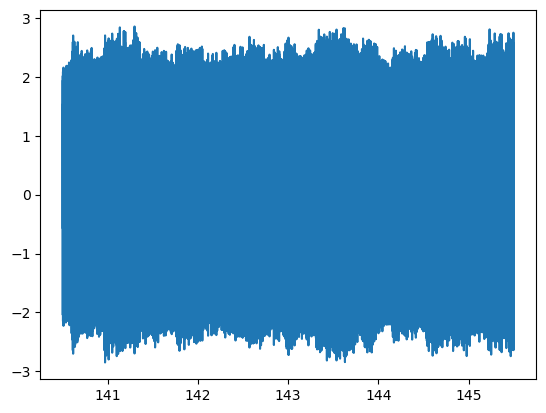

In [ ]:
y = (1+song/Ac)*c #Señal modulada

plt.plot(t, y)
plt.show()

Se pasa ahora a desmodular la señal, los pasos a seguir son:
1. Multiplicar por la portadora $c(t) = A_c \cos{2\pi F_c t}$


In [ ]:
mix = y * c

2. Dadas las propiedades del coseno esta multiplicacion separa la modulada en varias partes partes

$$
\begin{align*}
y(t) &= \left(1 + \frac{m(t)}{A_c} \right)c(t) \\
y(t)c(t) &= \left(1 + \frac{m(t)}{A_c} \right)c(t)^2 \\
&= A_c^2 \cos^2{(2\pi F_c t)} + A_c m(t) \cos^2{(2\pi F_c t)} \\
&= A_c^2 \cos^2{(2\pi F_c t)} + \frac{A_c}{2} m(t) + \frac{A_c}{2} m(t) \cos{(4\pi F_c t)} \\
&= \frac{A_c^2}{2} + \frac{A_c^2}{2}\cos{(4\pi F_c t)} + \frac{A_c}{2} m(t) + \frac{A_c}{2} m(t) \cos{(4\pi F_c t)}
\end{align*}
$$

3. Aplicacion de un filtro pasabajas que elimine las altas frecuencias de las portadoras, dejandonos asi unicamente con lo siguiente:

$$
\begin{align*}
    \frac{A_c^2}{2} + \frac{A_c}{2} m(t)
\end{align*}
$$

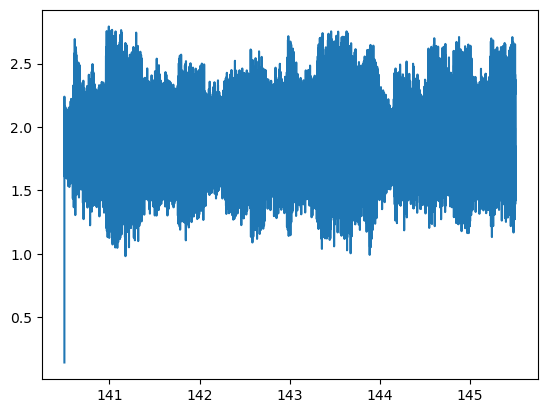

In [ ]:
from scipy.signal import ellip,  lfilter

filtro = "lowpass"
N = 5                #Se aplica un filtro pasabaja eliptico con frecuencia de corte igual a la frecuencia de la portadora
frec = Fc

ripple_pass = 1
ripple_stop = 100
num, den = ellip(N, rp=ripple_pass, rs=ripple_stop, Wn=frec, btype=filtro, fs=fs)

demodulada = lfilter(num, den, mix, axis=0)

plt.plot(t, demodulada)

4. Finalmente se resta $\frac{A_c^2}{2}$ y se escala por $\frac{2}{A_c}$ para obtener el mensaje (cancion)

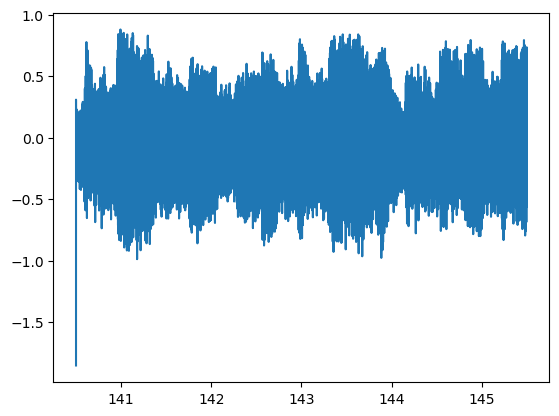

In [ ]:
demodulada_final = (2/Ac)*(demodulada - Ac*2/2)

plt.plot(t, demodulada_final)

Finalmente se reproduce la señal obtenida y se observa que son los mismos 5 segundos de la cancion, concluimos asi que la demdulacion fue exitosa

In [ ]:
Audio(demodulada_final.T, rate=fs)